# Analyse Exploratoire du fichier myreport_ram_full.csv

### Imports (fichier & modules)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [2]:
tab = pd.read_csv('../data/logServer/myreport_ram_full.csv',sep=',')

### Le fichier myreport_ram_full.csv : taille, colonnes

In [3]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  10  colonnes dans le data frame


In [4]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Mémoire disponible (%)',
       'Mémoire disponible (%)(RAW)', 'Mémoire disponible',
       'Mémoire disponible(RAW)', 'Temps mort', 'Temps mort(RAW)',
       'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [5]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date et heure                2882 non-null   object 
 1   Date et heure(RAW)           2881 non-null   float64
 2   Mémoire disponible (%)       2195 non-null   object 
 3   Mémoire disponible (%)(RAW)  2194 non-null   float64
 4   Mémoire disponible           2195 non-null   object 
 5   Mémoire disponible(RAW)      2194 non-null   float64
 6   Temps mort                   2195 non-null   object 
 7   Temps mort(RAW)              2194 non-null   float64
 8   Couverture                   2882 non-null   object 
 9   Couverture(RAW)              2881 non-null   float64
dtypes: float64(5), object(5)
memory usage: 225.3+ KB


On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [6]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                  2882
Date et heure(RAW)             2881
Mémoire disponible (%)           18
Mémoire disponible (%)(RAW)      36
Mémoire disponible              192
Mémoire disponible(RAW)        2193
Temps mort                        1
Temps mort(RAW)                   1
Couverture                        4
Couverture(RAW)                   3
dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [7]:
tab.head()


,Date et heure,Date et heure(RAW),Mémoire disponible (%),Mémoire disponible (%)(RAW),Mémoire disponible,Mémoire disponible(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,11 %,11.0,"7,19 Go",7.722679e+09,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,11 %,11.0,"7,16 Go",7.685439e+09,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,11 %,11.0,"7,15 Go",7.676204e+09,0 %,0.0,100 %,10000.0


In [8]:
tab["Date et heure"] = tab["Date et heure"].str.split(" - ").str[0]
tab = tab.iloc[:-5]
tab['Date et heure'] = pd.to_datetime(tab['Date et heure'], format="%d/%m/%Y %H:%M:%S")
start_date = '2024-08-24 23:32:03'
end_date = '2024-10-15 23:31:49'
tab = tab[(tab['Date et heure'] >= start_date) & (tab['Date et heure'] <= end_date)]

In [9]:
tab.shape

(1248, 10)

### Réagencement et Suppression des colonnes

In [10]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure(RAW)"])
tab = tab.drop(columns=["Mémoire disponible (%)"])
tab = tab.drop(columns=["Mémoire disponible"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

In [11]:
# renommage des colonnes
tab.rename(columns={"Mémoire disponible (%)(RAW)": "Mémoire disponible ram(%)"}, inplace=True)
tab.rename(columns={"Mémoire disponible(RAW)": "Mémoire disponible ram(Go)"}, inplace=True)
tab.rename(columns={"Temps mort(RAW)": "Temps mort ram(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture ram(%)"}, inplace=True)

In [12]:
tab.head()

,Date et heure,Mémoire disponible ram(%),Mémoire disponible ram(Go),Temps mort ram(%),Couverture ram(%)
288,2024-08-25 00:00:00,10.0000,7.131238e+09,0.0,10000.0
289,2024-08-25 01:00:00,10.0000,7.144664e+09,0.0,10000.0
290,2024-08-25 02:00:00,10.1667,7.164383e+09,0.0,10000.0
291,2024-08-25 03:00:00,10.0000,7.107289e+09,0.0,10000.0
292,2024-08-25 04:00:00,10.0000,7.079897e+09,0.0,10000.0


## Analyse temporelle

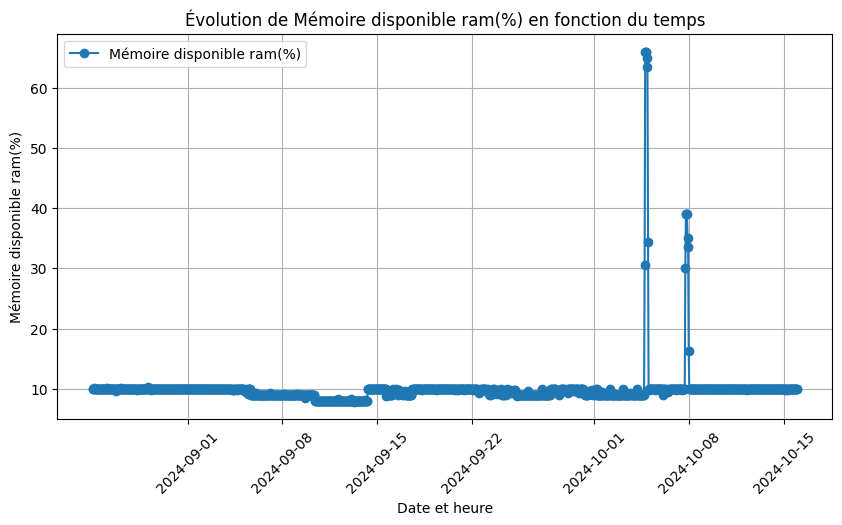

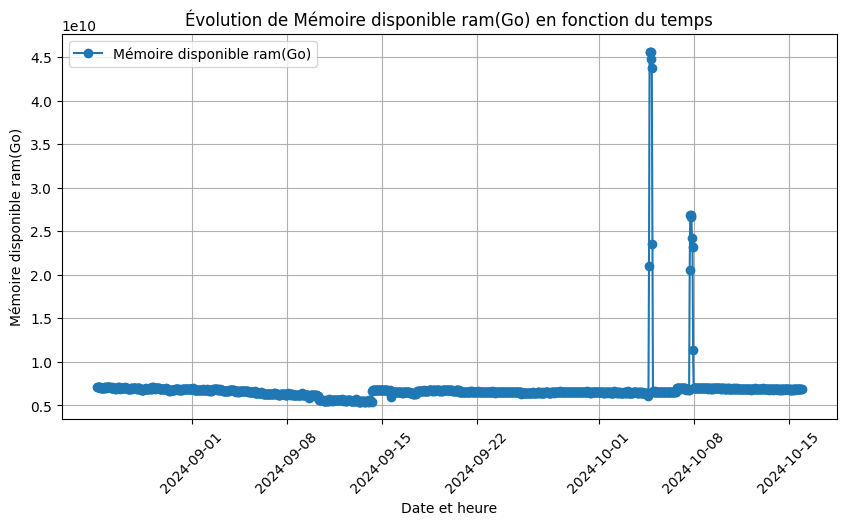

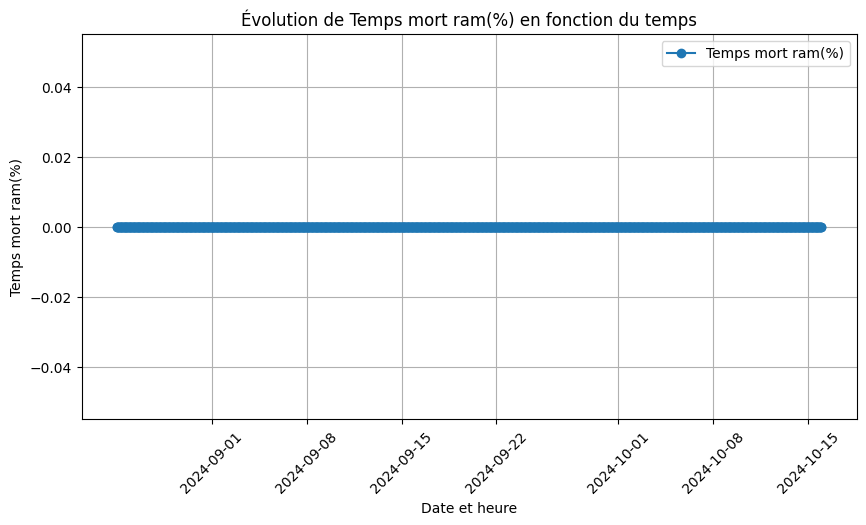

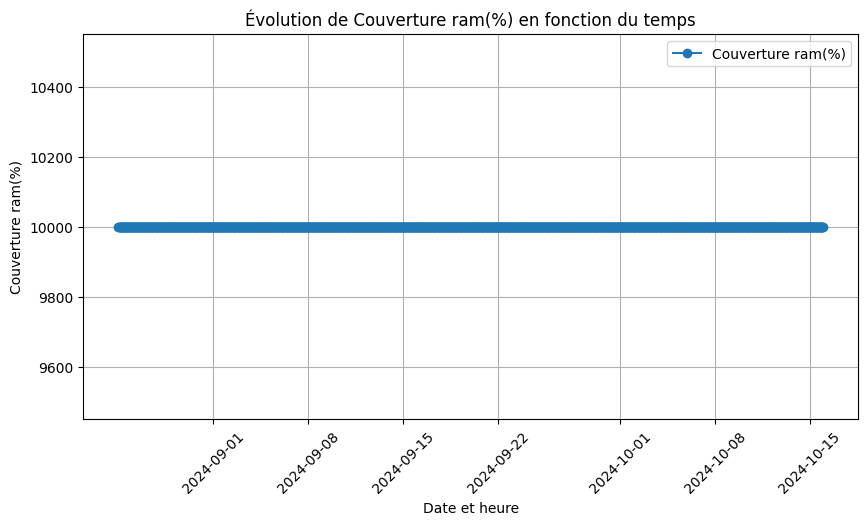

In [13]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import matplotlib.pyplot as plt

# Vérifier que 'Date et heure' est bien au format datetime
tab["Date et heure"] = pd.to_datetime(tab["Date et heure"])

# Liste des colonnes à exclure
excluded_cols = ["Date et heure"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["Date et heure"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

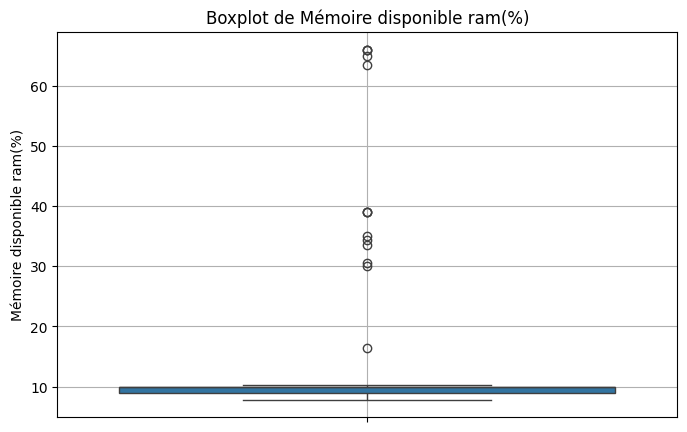

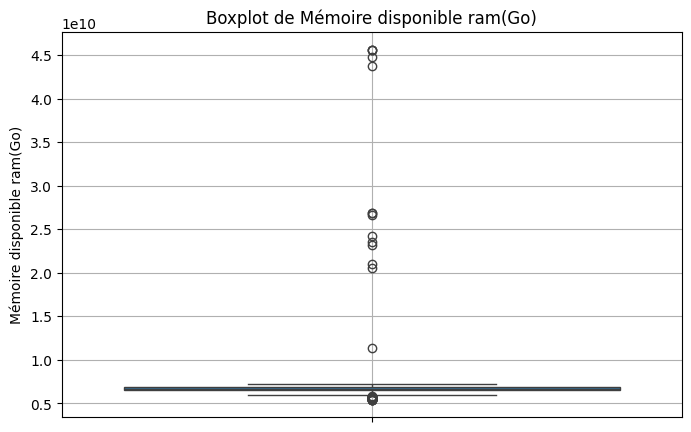

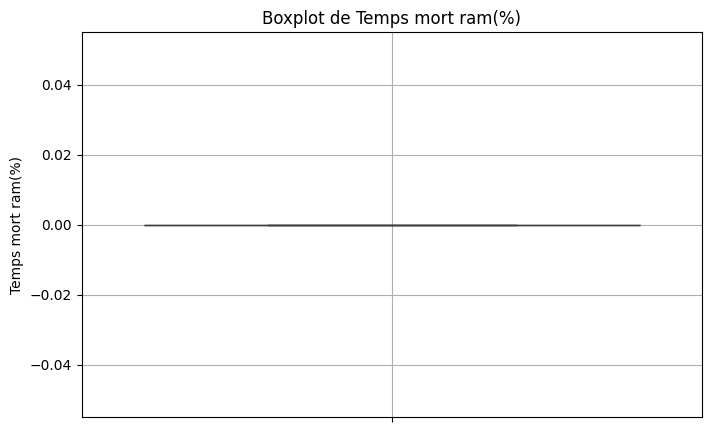

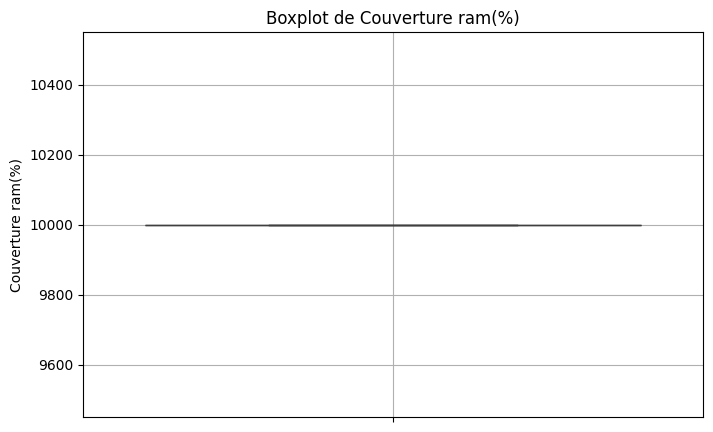

In [14]:
# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

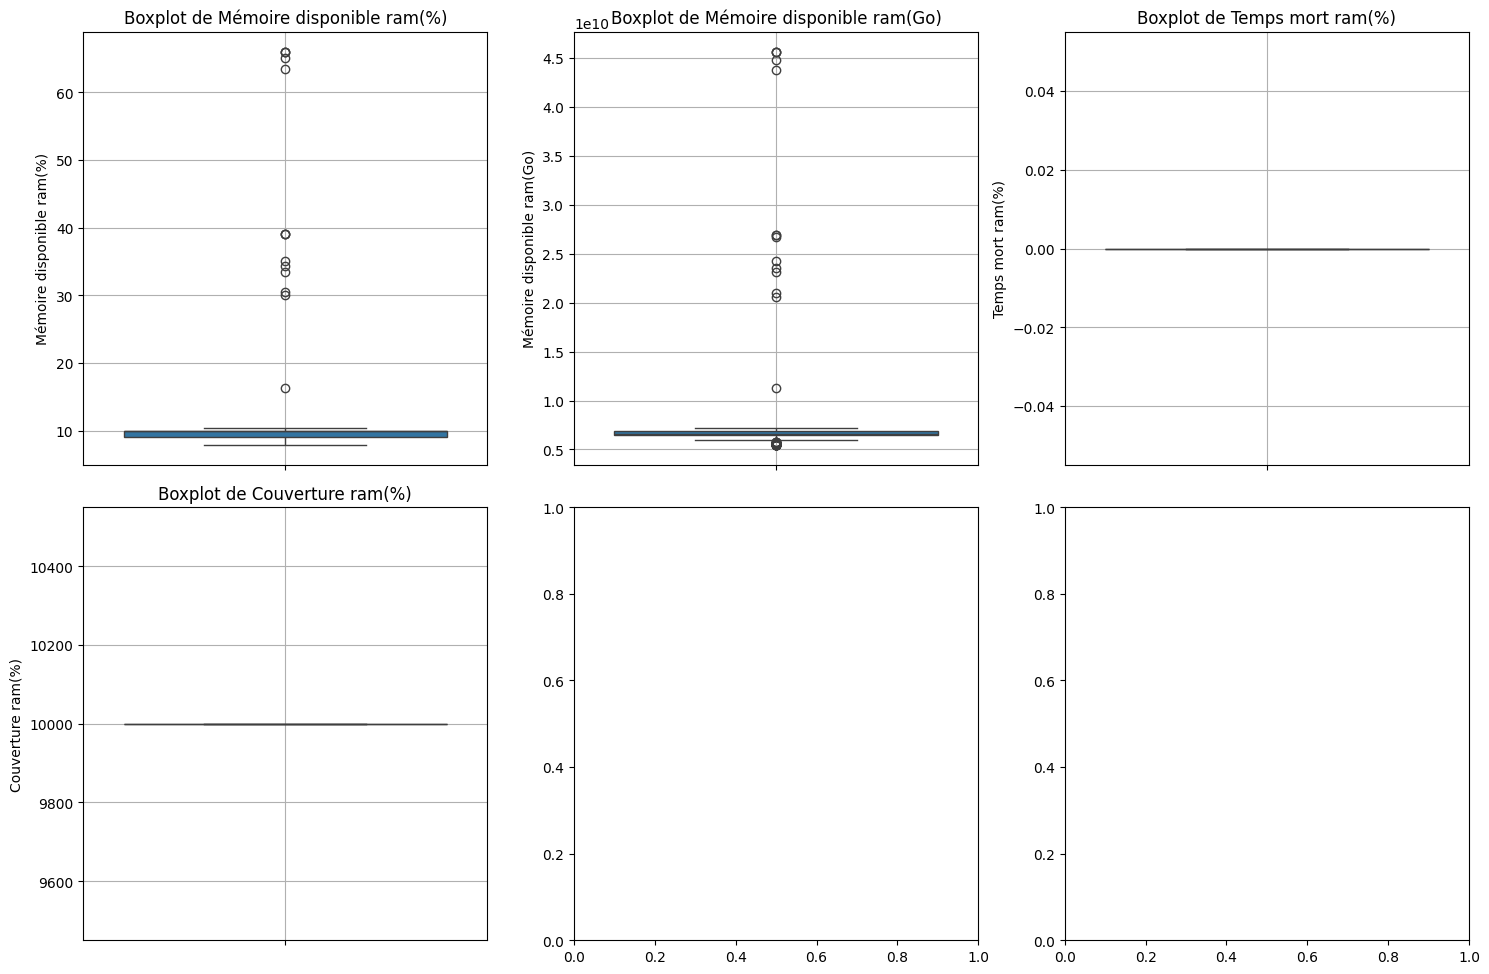

In [15]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [16]:
tab = tab.drop(columns=["Temps mort ram(%)"])

### Enregistrement du nouveau dataframe dans un nouveau csv

In [17]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_ram_filtered.csv", index=False, encoding='utf-8')